In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv (r'D:\digital factory\Dwell1\Dwell\DwellML\dataset\Dwell_Dataset_likelihood.csv')
print(df)


      Device_ID   Latitude  Longitude Start_time End_time   Category  \
0             1  41.879604 -87.633664       8:00     8:10  Fast Food   
1             1  41.877677 -87.634251       8:15     8:20    Parking   
2             1  41.880653 -87.636480       8:30    12:00       Work   
3             1  41.897865 -87.630874      17:30    23:59       Home   
4             2  41.879604 -87.633664       7:30     8:30  Fast Food   
...         ...        ...        ...        ...      ...        ...   
1074          5  41.881997 -87.627485       9:00    13:00  Groceries   
1075          6  41.881997 -87.627485      10:00    13:00  Groceries   
1076          6  41.883138 -87.630693      14:00    16:00    Library   
1077          6  41.897865 -87.630874      16:00    16:30       Home   
1078          6  41.890136 -87.631689      22:00    23:59  Nightclub   

      Category11  Gender  Gender01  Age  ... Days01  Days Days07  Week  \
0              0    Male         0   25  ...      1     M    

In [3]:
#df = pd.DataFrame({'Gender': ['Male', 'Female']})
#df = pd.DataFrame({'Days':['M','Tu','W','Th','F','Sa','Su']})
#print(pd.get_dummies(df))
#print(df)
df.describe()

,Device_ID,Latitude,Longitude,Category11,Gender01,Age,Days01,Days07,Week,Timeframehh,Duration,Likelihood1,Probability1,Likelihood2
count,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000
mean,3.469880,41.885617,-87.632174,4.358665,0.485635,27.101019,0.732159,3.029657,44.613531,13.388323,215.355885,0.989458,0.528669,0.986214
std,1.789676,0.008321,0.003255,3.722543,0.500025,1.493334,0.443039,1.968455,2.315921,4.849143,229.714672,0.062480,0.317468,0.073220
min,1.000000,41.874849,-87.636480,0.000000,0.000000,25.000000,0.000000,0.000000,41.000000,6.000000,-1170.000000,0.125000,0.058824,0.125000
25%,2.000000,41.880653,-87.634506,1.000000,0.000000,26.000000,0.000000,1.000000,43.000000,10.000000,55.000000,1.000000,0.250000,1.000000
50%,3.000000,41.881997,-87.630874,2.000000,0.000000,27.000000,1.000000,3.000000,45.000000,12.000000,210.000000,1.000000,0.500000,1.000000
75%,5.000000,41.897865,-87.630874,8.000000,1.000000,29.000000,1.000000,5.000000,47.000000,18.000000,374.000000,1.000000,1.000000,1.000000
max,6.000000,41.897865,-87.623633,10.000000,1.000000,29.000000,1.000000,6.000000,49.000000,22.000000,509.000000,1.125000,1.000000,1.125000


In [4]:
#df_x = df['Device_ID','Latitude','Longitude','Gender','Age','Days01','Days','Week','Timeframe','Likelihood2']
#df_x = df
df_x = df.drop(columns = ['Category','Category11','Days','Gender','Likelihood1','Likelihood2','Probability1','Start_time','Date','End_time','Timeframe','Days01','Week'])
df_y = df['Category11']
print(df_x)

      Device_ID   Latitude  Longitude  Gender01  Age  Days07  Timeframehh  \
0             1  41.879604 -87.633664         0   25       1            8   
1             1  41.877677 -87.634251         0   25       1            8   
2             1  41.880653 -87.636480         0   25       1            8   
3             1  41.897865 -87.630874         0   25       1           18   
4             2  41.879604 -87.633664         1   27       1            8   
...         ...        ...        ...       ...  ...     ...          ...   
1074          5  41.881997 -87.627485         0   27       0           10   
1075          6  41.881997 -87.627485         1   29       0           10   
1076          6  41.883138 -87.630693         1   29       0           14   
1077          6  41.897865 -87.630874         1   29       0           16   
1078          6  41.890136 -87.631689         1   29       0           22   

      Duration  
0           10  
1            5  
2          210  
3      

In [5]:
#Train_x = df_x[:-20]
#Train_y = df_y[:-20]
#Test_x = df_x[-20:]
#Test_y= df_y[-20:]

In [6]:
Train_x, Test_x, Train_y, Test_y = train_test_split(df_x, df_y, test_size=0.30, random_state=42)

In [7]:
Model = LogisticRegression(solver='liblinear', random_state=0)

In [8]:
fit=Model.fit(Train_x, Train_y)

In [9]:
Model.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [10]:
#Model.fit(Test_x,Test_y)

In [11]:
Model.score(Test_x,Test_y)

0.7808641975308642

In [12]:
confusion_matrix(Test_y, Model.predict(Test_x))

array([[13,  0,  2,  0,  0,  0,  0,  0, 14,  0,  0],
       [ 2, 35, 10,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 10, 93,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  8,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  5,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 22,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 14,  0,  0],
       [ 7,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 71]], dtype=int64)

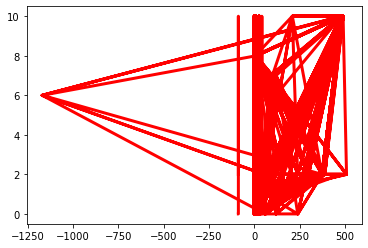

In [13]:
plt.plot(Test_x, Model.predict(Test_x), color='red',linewidth=3)


In [14]:
Pred_y= Model.predict(Test_x)
r2_score(Test_y, Pred_y)

0.5992858817776038

In [15]:
print(Test_x)


     Device_ID   Latitude  Longitude  Gender01  Age  Days07  Timeframehh  \
423          5  41.897865 -87.630874         0   27       1           18   
548          2  41.880653 -87.636480         1   27       1           10   
730          5  41.881997 -87.627485         0   27       3           18   
588          2  41.897865 -87.630874         1   27       3           18   
830          6  41.880653 -87.636480         1   29       1           10   
..         ...        ...        ...       ...  ...     ...          ...   
457          4  41.880653 -87.636480         0   26       3           10   
71           4  41.881997 -87.627485         0   26       4           18   
94           5  41.880653 -87.636480         0   27       5           10   
33           5  41.880653 -87.636480         0   27       2           10   
740          2  41.879604 -87.633664         1   27       4            8   

     Duration  
423       374  
548       480  
730        45  
588       374  
830    